# Data Science II: Hands-on Algorithms
## Unsupervised Learning/Clustering with KMeans
* Initialize random centroids
* Determine which centroid is closets to each sample and assign it to cluster
* Create new centroids by taking mean of each cluster
* Process can be repeated for different # of centroids to look at variance
### Example

In [56]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as ns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

data_bunch = load_iris()
X = data_bunch.data
y = data_bunch.target


In [25]:
distortion = []
estimators = []
for p in range(1,10):
    kmeans_model = KMeans(n_clusters=p, random_state=1).fit(X)
    estimators.append(kmeans_model)
    distortion.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,'euclidean'),axis=1)/X.shape[0]))

Text(0, 0.5, 'Distortion (Mean Euclidean distances)')

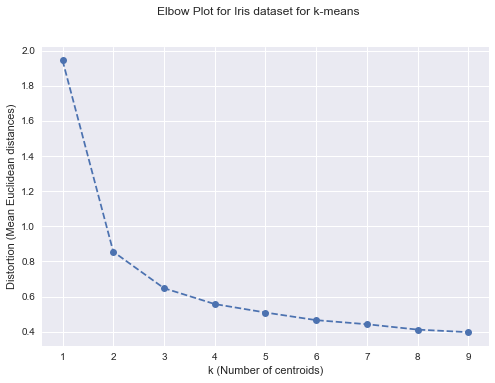

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(num=1, nrows=1, ncols=1, clear=True)
fig.suptitle("Elbow Plot for Iris dataset for k-means")
ax.plot(range(1,10), distortion, marker='o',linestyle='--')
ax.set_xlabel('k (Number of centroids)')
ax.set_ylabel('Distortion (Mean Euclidean distances)')

In [27]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
predict = kmeans_model.labels_
accuracy_score(y,predict)
f1_score(y, predict, average=None)

array([0.        , 0.        , 0.81818182])

### 3D Plotting

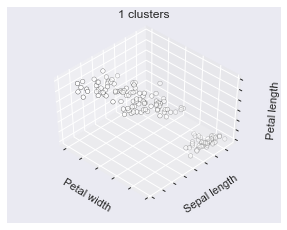

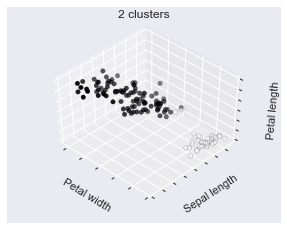

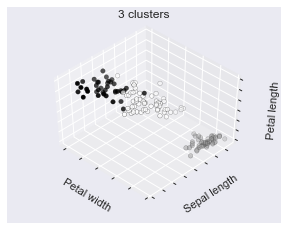

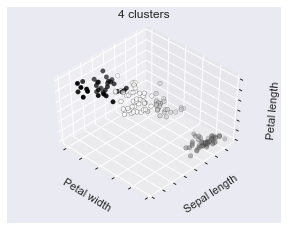

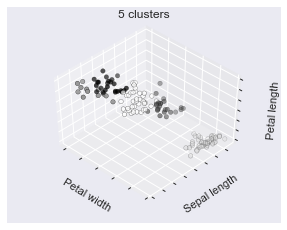

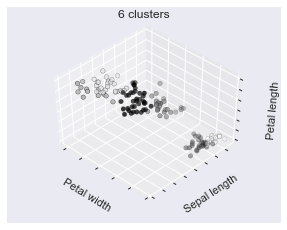

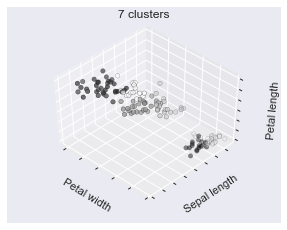

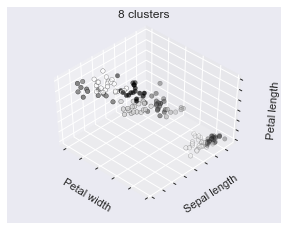

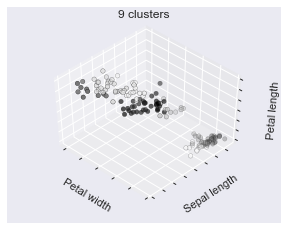

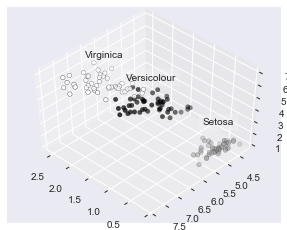

In [32]:
fignum = 1
titles = ['1 clusters', '2 clusters', '3 clusters', '4 clusters','5 clusters','6 clusters','7 clusters','8 clusters','9 clusters','10 clusters',]
for est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1
    
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

## Random Forest

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80)
forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',verbose=1)

forest_model.fit(X_train, y_train)
predict = forest_model.predict(X_test)
accuracy_score(y_test, predict)
confusion_matrix(y_test, predict)
f1_score(y_test, predict, average=None)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1.        , 0.93333333, 0.85714286])

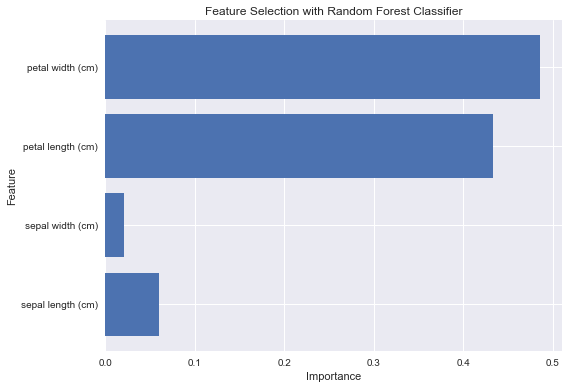

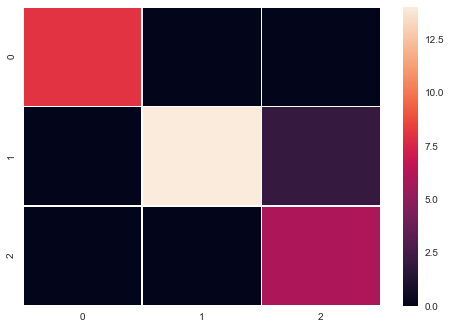

In [61]:
importances = forest_model.feature_importances_

plt.style.use('seaborn')
fig = plt.figure()
ax = plt.axes()

ax.barh(data_bunch.feature_names, importances)
ax.set_xlabel(('Importance'))
ax.set_ylabel('Feature')
ax.set_title('Feature Selection with Random Forest Classifier')
plt.tight_layout()



plt.style.use('seaborn')
fig = plt.figure()
ax = ns.heatmap(confusion_matrix(y_test, predict), linewidth=0.5)

## Linear Regression
### Example

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


Text(0.5, 0, 'Year')

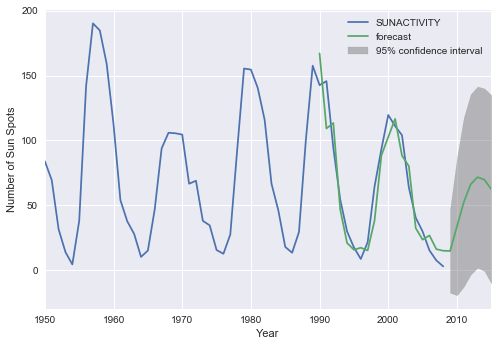

In [59]:
spot_series = sm.datasets.sunspots.load_pandas().data
spot_series.index =pd.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
spot_series.drop(columns='YEAR', inplace=True)
arma_mod = ARMA(spot_series, (3,0)).fit(disp=False)

plt.style.use('seaborn')
fig, ax2 = plt.subplots(num=3, clear=True)
ax = spot_series.loc['1950':].plot(ax=ax2)
arma_mod.plot_predict('1990','2015',dynamic=False, ax=ax, plot_insample=False)
ax.set_ylabel('Number of Sun Spots')
ax.set_xlabel('Year')